In [1]:
import sys
sys.path.append("../rl/")

## Problem 1

### Part (A) : Manually Calculate 

$$
  V_{0} = \begin{bmatrix} 10.0 \\ 1.0 \\ 0.0 \end{bmatrix}
$$

$$
    q_{1}(s_{1}, a_{1}) = 10.6 \\
    q_{1}(s_{1}, a_{2}) = 11.2 \\
    \pi_{1}(s1) = a_{2} \\
    v_{1}(s1) = 11.2
$$
  
$$
    q_{1}(s_{2}, a_{1}) = 4.3 \\
    q_{1}(s_{2}, a_{2}) = 4.3 \\
    \pi_{1}(s2) = a_{1}\ \text{or}\ a_{2} \\
    v_{1}(s2) = 4.3
$$

$$
  V_{1} = \begin{bmatrix} 11.2 \\ 4.3 \\ 0.0 \end{bmatrix} \\
  \pi_{1} = \begin{bmatrix} a_{2} \\ a_{1}\ \text{or}\ a_{2}  \end{bmatrix}
$$
  
$$
    q_{2}(s_{1}, a_{1}) = 12.82 \\
    q_{2}(s_{1}, a_{2}) = 11.98 \\
    \pi_{2}(s1) = a_{1} \\
    v_{2}(s1) = 12.82
$$
  
$$
    q_{2}(s_{2}, a_{1}) = 5.65 \\
    q_{2}(s_{2}, a_{2}) = 5.89 \\
    \pi_{2}(s2) = a_{2} \\
    v_{2}(s2) = 5.89
$$
  
$$
  V_{2} = \begin{bmatrix} 12.82 \\ 5.89 \\ 0.0 \end{bmatrix} \\
  \pi_{2} = \begin{bmatrix} a_{1} \\ a_{2} \end{bmatrix}
$$

  
### Part (B) : Policy remains the same
  
__NOTE:__ The value function for $s_{3}$ will remain 0.0.  
  
__For State $s_{1}$:__ The action $a_{1}$ puts more weight on $s_{1}$ and $s_{2}$ than action $a_{2}$. Since the value function is non-decreasing, the optimal action for $s_{1}$ is $a_{1}$.  

__For State $s_{2}$:__ Similar to the reasoning above ^, action $a_{2}$ for state $s_{2}$ assigns equal or more weight to states $s_{1}$ and $s_{2}$. So we expect $a_{2}$ to be the optimal action for state $s_{2}$.



## Problem 2

In [6]:
import sys
sys.path.append("../rl/")

from markov_decision_process import FiniteMarkovDecisionProcess, FinitePolicy
from distribution import Categorical, Choose, Constant
from collections import defaultdict
import numpy as np
import seaborn as sns
from rl.dynamic_programming import (policy_iteration, value_iteration)

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def get_frog_MDP(N=10):
    action_mapping = {}

    action_mapping[0], action_mapping[N] = None, None
    
    reward_func = lambda s: 1.0*(s==N) #- 10.0*(s==0)
    
    for i in range(1, N, 1):
        action_mapping[i] = {
            '0': Categorical({ (i-1, reward_func(i-1)):(i/N), (i+1, reward_func(i+1)):(1-(i/N)) }),
            '1': Categorical({ (j, reward_func(j)): (1/N) for j in range(0, N+1, 1) if j != i })
        }
    
    return FiniteMarkovDecisionProcess(action_mapping)
    

In [40]:
# N=100

In [43]:
# Value Iteration
def VI_iter(N):
    v_vi_stable = None
    for (i, v_vi) in enumerate(value_iteration(mdp=get_frog_MDP(N=N), gamma=0.99)):
        if v_vi_stable is not None:
            if v_vi_stable == v_vi:
#                 print(f"finished Value Iteration in iteration {i}")
#                 break
                return i
        v_vi_stable = v_vi 

In [44]:
# Policy Iteration
def PI_iter(N):
    v_pl_stable = None
    for (i, v_pl) in enumerate(policy_iteration(mdp=get_frog_MDP(N=N), gamma=0.99)):
        if v_pl_stable is not None:
            if v_pl_stable[0] == v_pl[0]:
#                 print(f"finished Policy Iteration in iteration {i}")
#                 break
                return i
        v_pl_stable = v_pl 

In [46]:
Ns

array([1])

In [51]:
Ns = np.arange(2, 103, 5)

VI_num_iters = [VI_iter(n) for n in Ns]
PI_num_iters = [PI_iter(n) for n in Ns]


<AxesSubplot:>

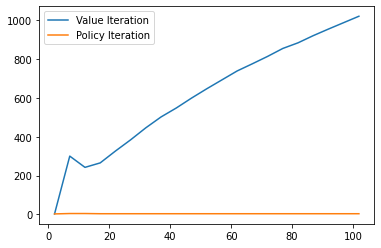

In [54]:
sns.lineplot(x=Ns, y=VI_num_iters, label="Value Iteration")
sns.lineplot(x=Ns, y=PI_num_iters, label="Policy Iteration")

## Problem 3

The state is the tuple of (current wage, _{}$

<AxesSubplot:>

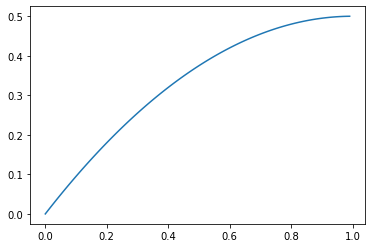

In [64]:
X = np.arange(0, 1.0, 0.011)
alpha = 1

util = X - alpha * X * X * 0.5

sns.lineplot(x=X, y=util)